Boosting is an Ensemble method that combines several weak leaners into a strong learner. The main idea is to train predictors sequentially, each trying to correct its predecessor.

### AdaBoost Scikit-Learn

Scikit-Learn actually uses a multiclass version of AdaBoost called SAMME (Stagewise Additive Modeling using a Multiclass Exponential loss function). When there are just two classes, SAMME is equivalent to AdaBoost. Moreover, if the
predictors can estimate class probabilities (i.e., if they have a predict_proba()
method), Scikit-Learn can use a variant of SAMME called SAMME.R (the R stands
for "Real"), which relies on class probabilities rather than predictions and generally
performs better.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

If the AdaBoost ensemble is overfitting the training set, we can
try reducing the number of estimators or more strongly regularizing
the base estimator.

# AdaBoost

In Random Forests, each time you make a tree, you make a full sized tree, some might be bigger than others, but there is no predetermined maximum depth. 
 * All trees have an equal vote in the final classification
 * Each tree is made independently of the others

In contrast, in a forest of trees made with AdaBoost, the trees are usually just a node and two leaves (_stump_). Stump are weak learners.
 * Combines weak learners to make classifications
 * In a Forest of Stumps made with AdaBoost, some stumps get more say in the final classification than others.
 * Order is important &rarr; the errors the first stump makes influence how the second stump is made, and so on

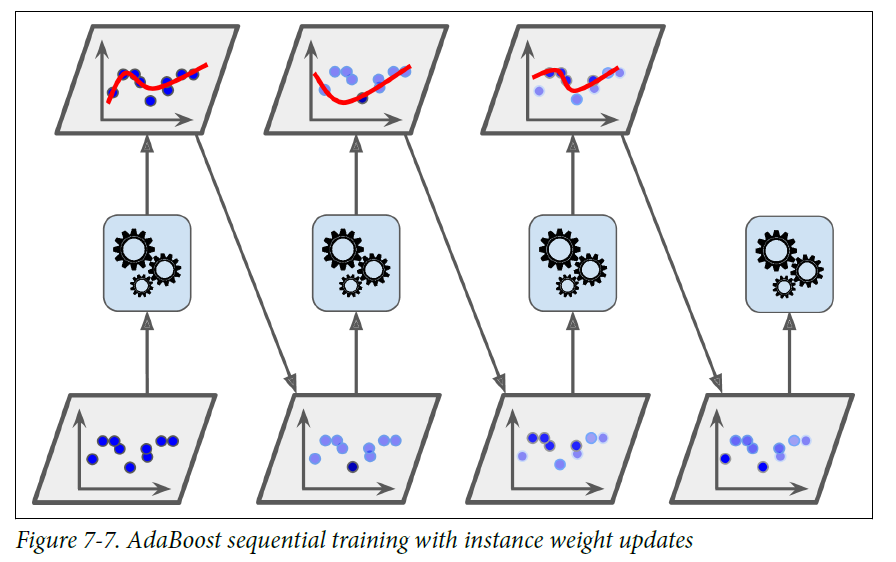

As you can see, this sequential learning technique has some
similarities with Gradient Descent, except that instead of tweaking a single predictor’s
parameters to minimize a cost function, AdaBoost adds predictors to the ensemble,
gradually making it better.

Con: AdaBoost cannot be parallelized, since each predictor can only be trained after the previous predictor has been trained and evaluated &rarr; it does no scale well as bagging or pasting.



## Creating a Forest of Stumps


### 1) Start with some data

<div>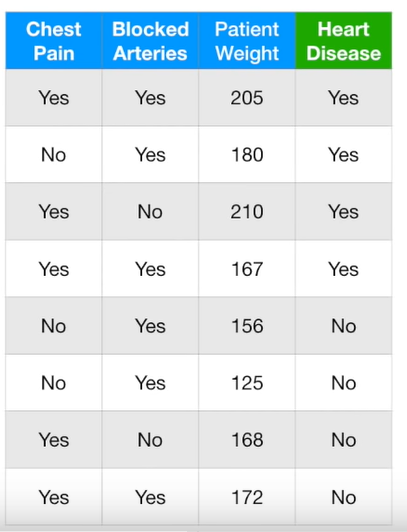</div>
 
### 2) Give each sample a weight that indicates how important it is to be correctly classified. At the start, all samples get the same weight, $\frac{1}{n_{samples}}$
 
<div>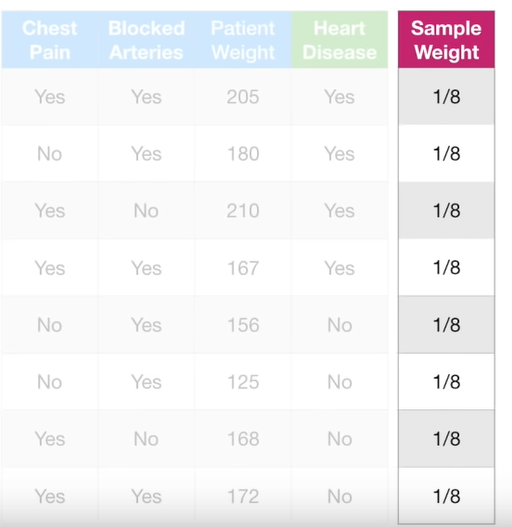</div>
 
### 3) Find the variable (feature) that splits the root (Gini impurity)

<div>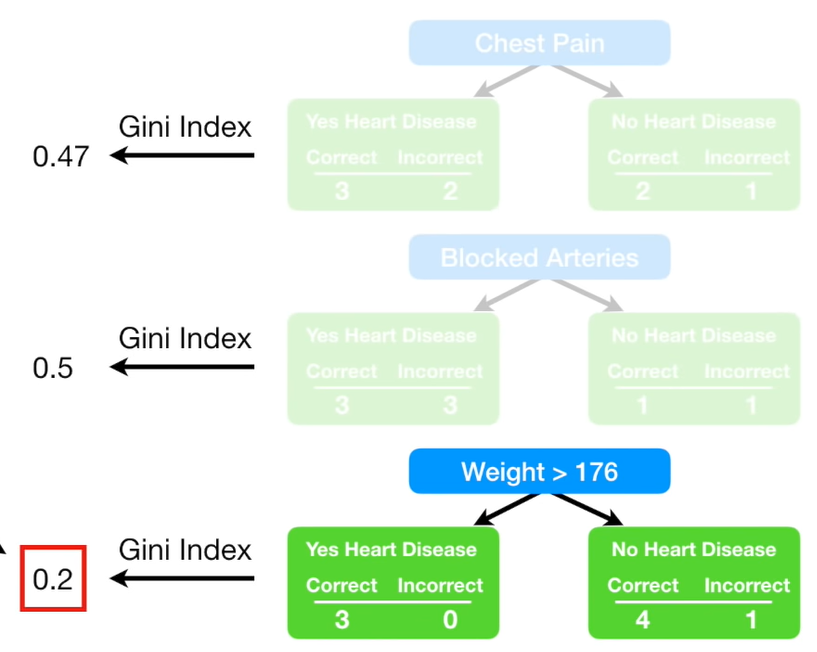</div>

### 4) Now we determine how much say the stump will have in the final classification

We determine how much say a stump has in the final classification base on how well it classified the samples.

<div>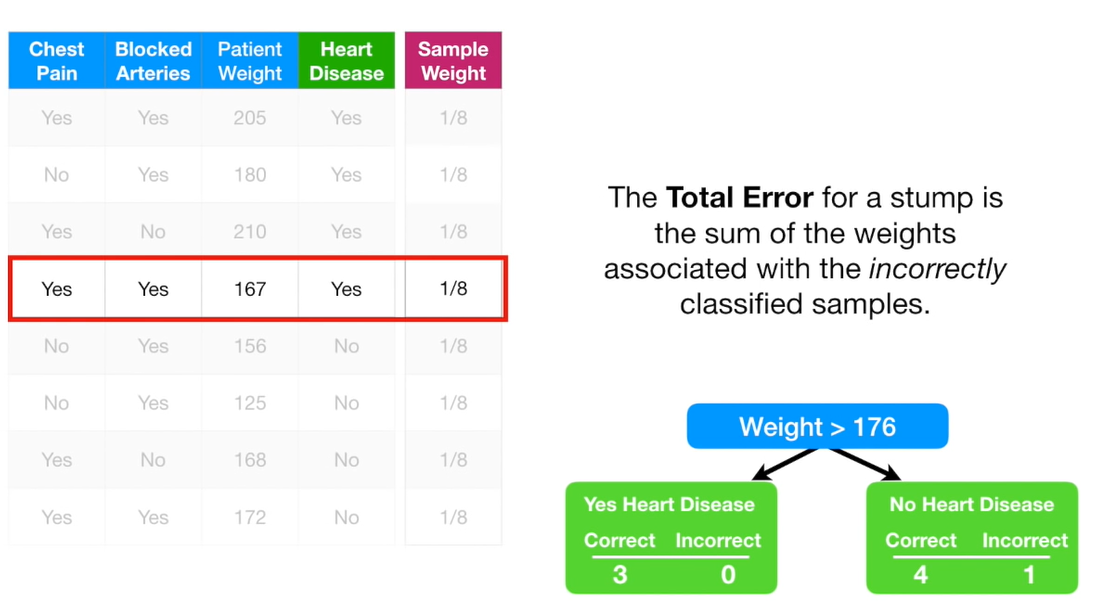</div>


$$Amount of Say = \frac{1}{2}log(\frac{1-Total Error}{Total Error})$$

Obs: on the book, the $\frac{1}{2}$ is actually considered a hyperparameter $\eta$

We can see from the amount of say plot how its magnitue scale with the total error size

<div>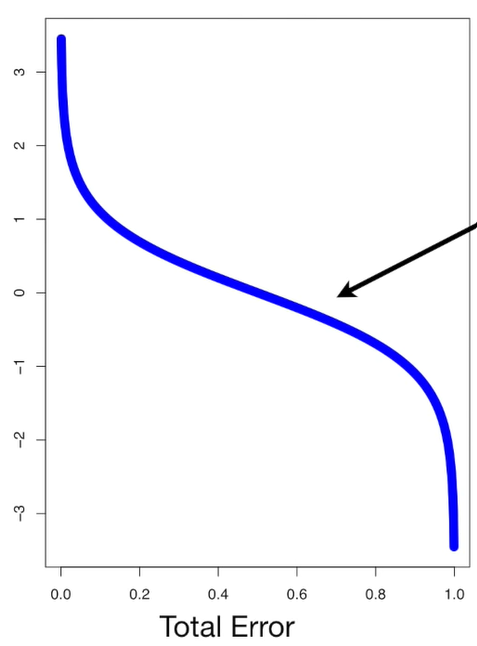</div>

### 5) Modify the weights so that the next stump will take the errors the current stump made into account

We emphasize the importance of incorreclty classified samples being correctly classified in the next stump by <b>increasing its sample weight, while decreasing the other sample weights.</b>

* The weight of _incorrectly_ classified samples:

$$New Sample Weight = sample Weight \times e^{Amount of Say} $$


<div>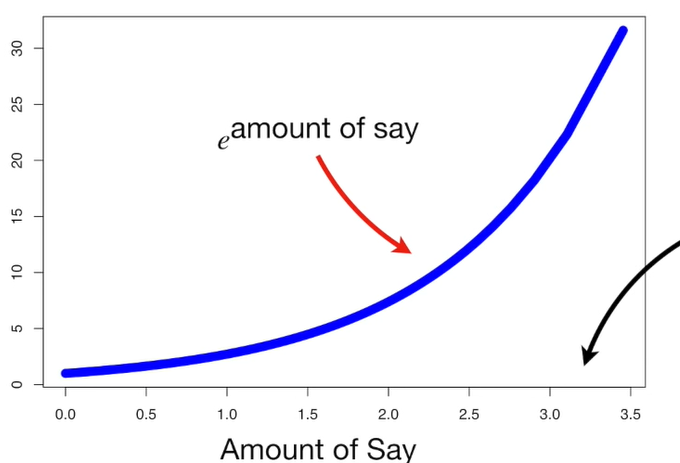</div>

* The weight of _correctly_ classified samples:

$$New Sample Weight = sample Weight \times e^{-Amount of Say} $$


### 6) Normalize the New Sample Weights so that they will add up to 1.

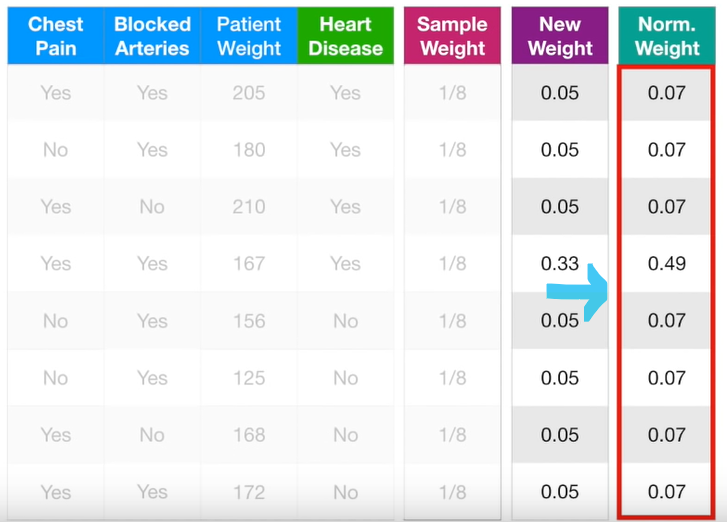

### 7) Create a new dataset sample with replacement from the original dataset.



Pick random numbers and add samples to the new collection until the new collection is the same size as the original.

### Give all the samples equal Sample Weights, just like the original

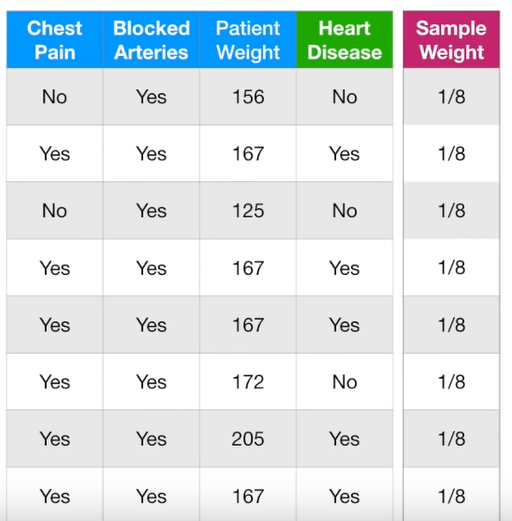

### 8) How AdaBoost makes classifications

<div>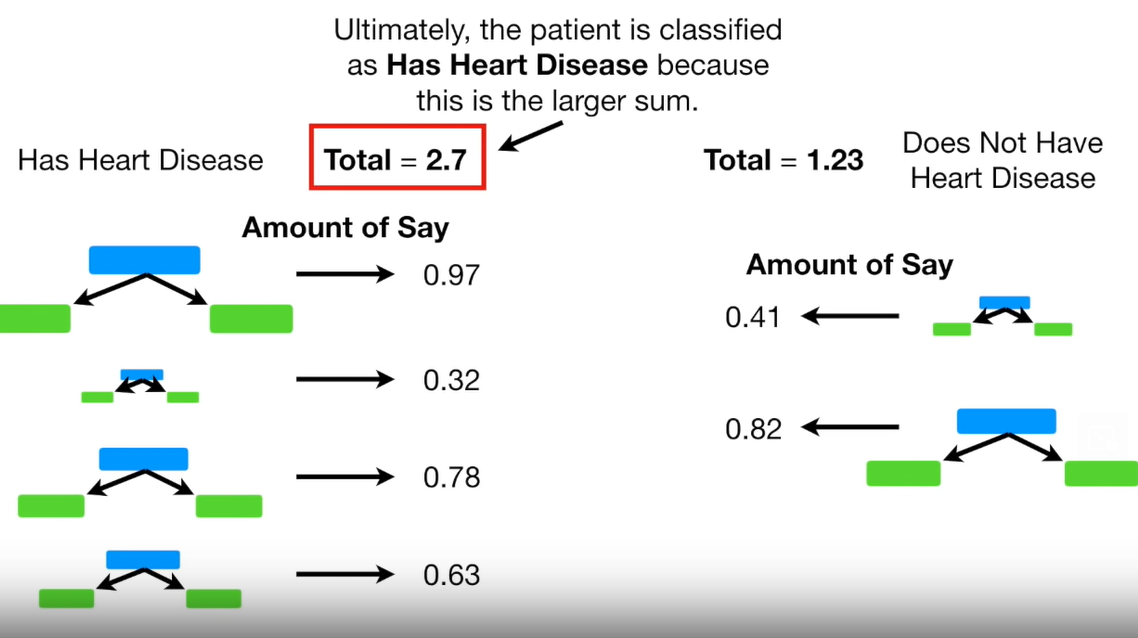</div>
